<a href="https://colab.research.google.com/github/M-TALH007/mL_1/blob/main/machine_learning_assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=2)  # reduced display precision on numpy arrays


In [38]:
df = pd.read_csv("Housing.csv")
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
207,4900000,3000,3,1,2,yes,no,yes,no,yes,0,no,semi-furnished
282,4270000,2175,3,1,2,no,yes,yes,no,yes,0,no,unfurnished
493,2800000,3960,3,1,1,yes,no,no,no,no,0,no,furnished
92,6405000,4800,3,2,4,yes,yes,no,no,yes,0,no,furnished
320,4060000,4320,3,1,2,yes,no,no,no,no,2,yes,furnished
38,7962500,6000,3,1,4,yes,yes,no,no,yes,2,no,unfurnished
56,7343000,11440,4,1,2,yes,no,yes,no,no,1,yes,semi-furnished
340,3850000,5300,5,2,2,yes,no,no,no,no,0,no,semi-furnished
71,6755000,6000,4,2,4,yes,no,no,no,yes,0,no,unfurnished
141,5652500,6660,4,2,2,yes,yes,yes,no,no,1,yes,semi-furnished


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [40]:
df.shape


(545, 13)

In [41]:
for column in df:
      print(f'{column}:{df[column].unique()}')

price:[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000

In [42]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')
print_unique_col_values(df)


mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [43]:
yes_no_columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
for col in yes_no_columns:
    df[col].replace({'yes': 1,'no': 0},inplace=True)

In [44]:
for column in df:
      print(f'{column}:{df[column].unique()}')

price:[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4907000  4900000

In [45]:
df1 = pd.get_dummies(data=df, columns=['furnishingstatus'])
df1.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus_furnished',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')

In [46]:
df1.sample(4)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
311,4123000,6060,2,1,1,1,0,1,0,0,1,0,0,1,0
321,4025000,3630,3,2,2,1,0,0,1,0,2,0,0,1,0
419,3360000,4960,4,1,3,0,0,0,0,0,0,0,0,1,0
125,5943000,15600,3,1,1,1,0,0,0,1,2,0,0,1,0


In [47]:
df1.dtypes

price                              int64
area                               int64
bedrooms                           int64
bathrooms                          int64
stories                            int64
mainroad                           int64
guestroom                          int64
basement                           int64
hotwaterheating                    int64
airconditioning                    int64
parking                            int64
prefarea                           int64
furnishingstatus_furnished         uint8
furnishingstatus_semi-furnished    uint8
furnishingstatus_unfurnished       uint8
dtype: object

In [48]:
cols_to_scale = ['price','area','bedrooms','bathrooms','stories','parking']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [49]:
df1.sample(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
500,0.078788,0.079038,0.4,0.000000,0.000000,1,0,0,0,0,0.000000,0,0,0,1
284,0.218182,0.420619,0.2,0.000000,0.000000,1,0,0,0,0,0.333333,0,1,0,0
136,0.345455,0.257732,0.6,0.333333,0.333333,1,0,0,0,1,0.666667,0,0,0,1


In [50]:
for column in df1:
      print(f'{column}:{df1[column].unique()}')

price:[1.   0.91 0.91 0.84 0.79 0.73 0.7  0.7  0.69 0.65 0.65 0.64 0.62 0.62
 0.62 0.61 0.6  0.6  0.59 0.59 0.58 0.58 0.57 0.56 0.55 0.55 0.54 0.54
 0.54 0.53 0.53 0.53 0.52 0.5  0.5  0.5  0.49 0.49 0.48 0.48 0.48 0.47
 0.47 0.46 0.46 0.45 0.45 0.45 0.44 0.44 0.43 0.43 0.43 0.42 0.42 0.42
 0.42 0.41 0.41 0.41 0.4  0.4  0.39 0.39 0.39 0.39 0.38 0.38 0.38 0.38
 0.38 0.38 0.37 0.36 0.36 0.36 0.36 0.36 0.35 0.35 0.35 0.35 0.34 0.33
 0.33 0.33 0.33 0.32 0.32 0.32 0.32 0.31 0.31 0.31 0.3  0.3  0.3  0.3
 0.29 0.29 0.29 0.28 0.28 0.28 0.28 0.28 0.28 0.27 0.27 0.27 0.27 0.27
 0.26 0.26 0.26 0.26 0.25 0.25 0.25 0.25 0.25 0.24 0.24 0.24 0.24 0.24
 0.23 0.23 0.23 0.23 0.23 0.22 0.22 0.22 0.22 0.22 0.22 0.21 0.21 0.21
 0.21 0.21 0.2  0.2  0.2  0.2  0.2  0.19 0.19 0.18 0.18 0.18 0.18 0.18
 0.18 0.17 0.17 0.17 0.17 0.16 0.16 0.16 0.16 0.15 0.15 0.15 0.15 0.15
 0.14 0.14 0.14 0.14 0.14 0.14 0.13 0.13 0.13 0.13 0.12 0.12 0.12 0.12
 0.12 0.12 0.12 0.11 0.11 0.11 0.11 0.1  0.1  0.1  0.1  0.09 0.09 0.08
 

In [51]:
X_train =df1.drop('price',axis='columns')
y_train =df1['price']


In [52]:
y_train.shape

(545,)

In [53]:
# data is stored in numpy array/matrix
print(f"X Shape: {X_train.shape}, X Type:{type(X_train)})")
print(X_train)
print(f"y Shape: {y_train.shape}, y Type:{type(y_train)})")
print(y_train)

X Shape: (545, 14), X Type:<class 'pandas.core.frame.DataFrame'>)
         area  bedrooms  bathrooms   stories  mainroad  guestroom  basement  \
0    0.396564       0.6   0.333333  0.666667         1          0         0   
1    0.502405       0.6   1.000000  1.000000         1          0         0   
2    0.571134       0.4   0.333333  0.333333         1          0         1   
3    0.402062       0.6   0.333333  0.333333         1          0         1   
4    0.396564       0.6   0.000000  0.333333         1          1         1   
..        ...       ...        ...       ...       ...        ...       ...   
540  0.092784       0.2   0.000000  0.000000         1          0         1   
541  0.051546       0.4   0.000000  0.000000         0          0         0   
542  0.135395       0.2   0.000000  0.000000         1          0         0   
543  0.086598       0.4   0.000000  0.000000         0          0         0   
544  0.151203       0.4   0.000000  0.333333         1          0

In [54]:
X_train.shape
X_train = X_train.to_numpy()
y_train = y_train.to_numpy()

In [55]:
num_samples, num_features = X_train.shape
random_weights = np.random.rand(num_features)
print(random_weights)

[0.03 0.45 0.51 0.16 0.19 0.55 0.87 0.73 0.33 0.07 0.69 0.42 0.19 0.41]


In [56]:
b_init = 785.1811367994083
w_init = random_weights
print(f"w_init shape: {w_init.shape}, b_init type: {type(b_init)}")

w_init shape: (14,), b_init type: <class 'float'>


In [57]:
def predict_single_loop(x, w, b):
    n = x.shape[0]
    p = 0
    for i in range(n):
        p_i = x[i] * w[i]
        p = p + p_i
    p = p + b
    return p

In [63]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict_single_loop(x_vec, w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (14,), x_vec value: [0.4  0.6  0.33 0.67 1.   0.   0.   0.   1.   0.67 1.   1.   0.   0.  ]
f_wb shape (), prediction: 787.416831493842


In [58]:
def predict(x, w, b):
    p = np.dot(x, w) + b
    return p

In [64]:
x_vec = X_train[0,:]
print(f"x_vec shape {x_vec.shape}, x_vec value: {x_vec}")

# make a prediction
f_wb = predict(x_vec,w_init, b_init)
print(f"f_wb shape {f_wb.shape}, prediction: {f_wb}")

x_vec shape (14,), x_vec value: [0.4  0.6  0.33 0.67 1.   0.   0.   0.   1.   0.67 1.   1.   0.   0.  ]
f_wb shape (), prediction: 787.416831493842


In [65]:
def compute_cost(X, y, w, b):

    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b           #(n,)(n,) = scalar (see np.dot)
        cost = cost + (f_wb_i - y[i])**2       #scalar
    cost = cost / (2 * m)                      #scalar
    return cost

In [66]:
# Compute and display cost using our pre-chosen optimal parameters.
cost = compute_cost(X_train, y_train, w_init, b_init)
print(f'Cost at optimal w : {cost}')

Cost at optimal w : 309212.82372054073


In [67]:
def compute_gradient(X, y, w, b):
    m,n = X.shape           #(number of examples, number of features)
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [68]:
#Compute and display gradient
tmp_dj_db, tmp_dj_dw = compute_gradient(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 786.4001270915379
dj_dw at initial w,b: 
 [189.22 309.1   75.06 211.16 675.34 140.12 275.86  36.1  248.28 181.84
 184.87 202.08 327.5  256.82]


In [69]:
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = gradient_function(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None

        if i<100000:      # prevent resource exhaustion
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")

    return w, b, J_history #return final w,b and J history for graphing


# First learning rate 0.1

In [70]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.1
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.03   
Iteration  100: Cost     0.01   
Iteration  200: Cost     0.00   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
b,w found by gradient descent: 0.01,[ 0.26  0.07  0.24  0.12  0.04  0.03  0.03  0.07  0.08  0.08  0.06  0.02
  0.01 -0.02] 
prediction: 0.55, target value: 0.9999999999999999
prediction: 0.75, target value: 0.9090909090909091
prediction: 0.49, target value: 0.9090909090909091
prediction: 0.57, target value: 0.9060606060606061
prediction: 0.43, target value: 0.8363636363636363
prediction: 0.57, target value: 0.7878787878787878
prediction: 0.69, target value: 0.7272727272727273
prediction: 0.54, target value: 0.7272727272727273
prediction: 0.50, target value: 0.703030303030303
prediction: 0.51, target value: 0.6969696969696969
prediction: 0.55, target value: 0.696

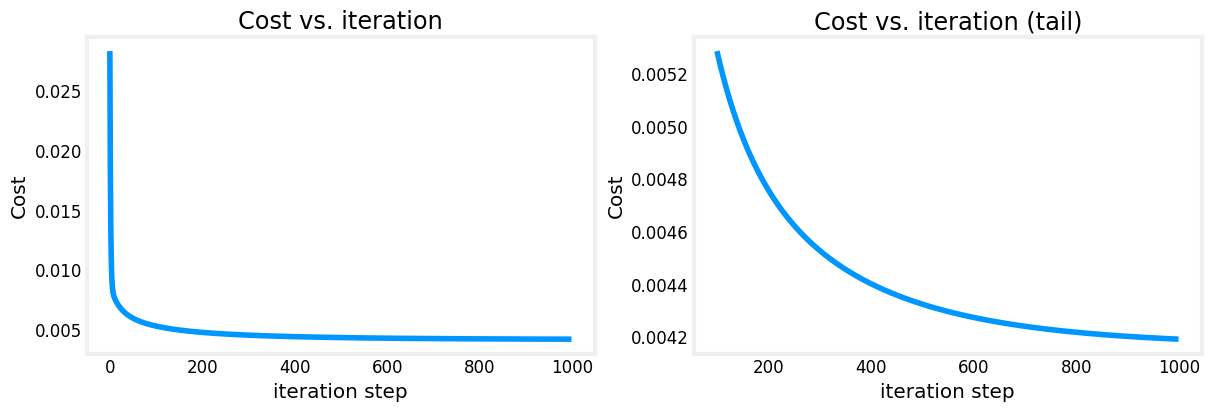

In [71]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# *Second learning rate is 0.01*

In [72]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.01
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.05   
Iteration  100: Cost     0.01   
Iteration  200: Cost     0.01   
Iteration  300: Cost     0.01   
Iteration  400: Cost     0.01   
Iteration  500: Cost     0.01   
Iteration  600: Cost     0.01   
Iteration  700: Cost     0.01   
Iteration  800: Cost     0.01   
Iteration  900: Cost     0.01   
b,w found by gradient descent: 0.05,[ 0.08  0.06  0.08  0.09  0.06  0.04  0.03  0.03  0.09  0.08  0.06  0.04
  0.03 -0.02] 
prediction: 0.50, target value: 0.9999999999999999
prediction: 0.56, target value: 0.9090909090909091
prediction: 0.40, target value: 0.9090909090909091
prediction: 0.53, target value: 0.9060606060606061
prediction: 0.45, target value: 0.8363636363636363
prediction: 0.47, target value: 0.7878787878787878
prediction: 0.56, target value: 0.7272727272727273
prediction: 0.29, target value: 0.7272727272727273
prediction: 0.51, target value: 0.703030303030303
prediction: 0.47, target value: 0.6969696969696969
prediction: 0.49, target value: 0.696

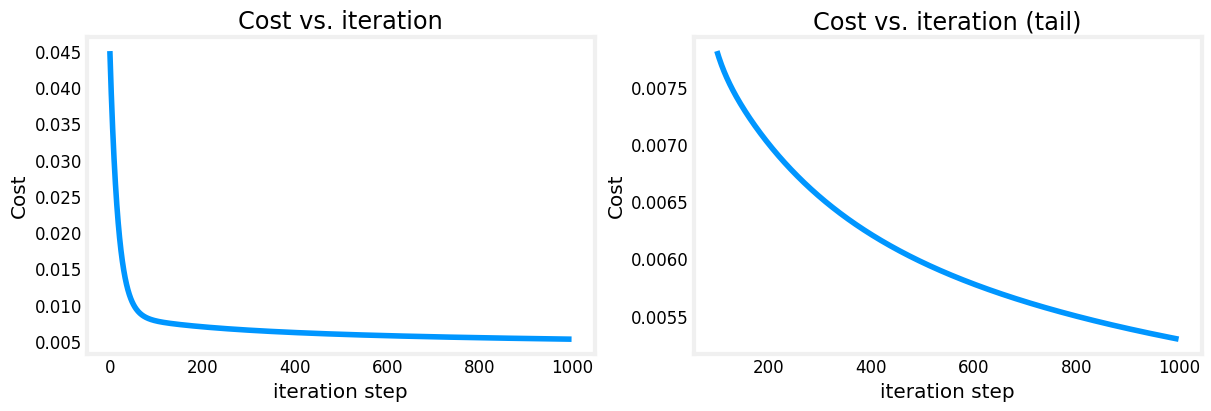

In [73]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# *Third learning rate is 0.0000005*




In [82]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.000005
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.05   
Iteration  100: Cost     0.05   
Iteration  200: Cost     0.05   
Iteration  300: Cost     0.05   
Iteration  400: Cost     0.05   
Iteration  500: Cost     0.05   
Iteration  600: Cost     0.05   
Iteration  700: Cost     0.05   
Iteration  800: Cost     0.05   
Iteration  900: Cost     0.05   
b,w found by gradient descent: 0.00,[3.76e-04 5.53e-04 1.94e-04 4.46e-04 1.20e-03 3.09e-04 5.26e-04 7.52e-05
 5.79e-04 3.89e-04 4.17e-04 4.14e-04 5.65e-04 3.17e-04] 
prediction: 0.01, target value: 0.9999999999999999
prediction: 0.01, target value: 0.9090909090909091
prediction: 0.00, target value: 0.9090909090909091
prediction: 0.01, target value: 0.9060606060606061
prediction: 0.01, target value: 0.8363636363636363
prediction: 0.01, target value: 0.7878787878787878
prediction: 0.01, target value: 0.7272727272727273
prediction: 0.00, target value: 0.7272727272727273
prediction: 0.01, target value: 0.703030303030303
prediction: 0.01, target value: 0.696969696969

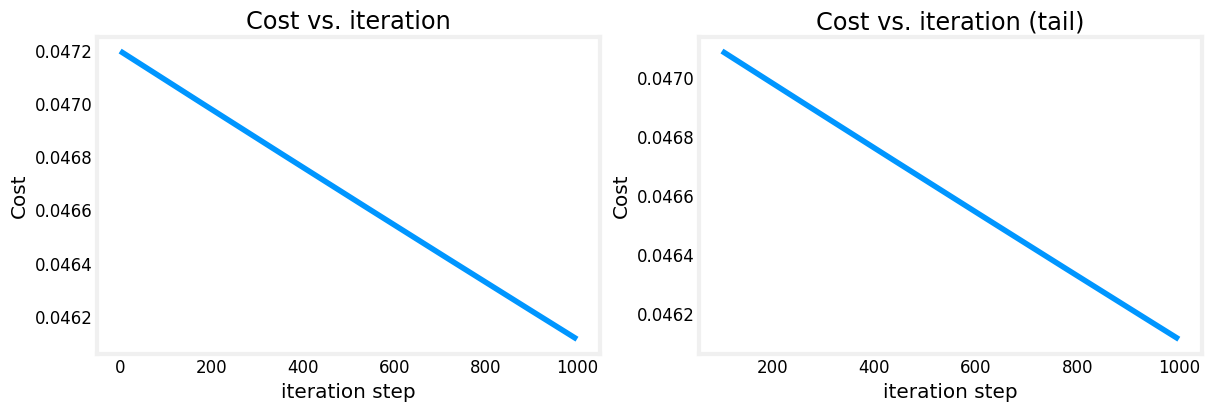

In [83]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# *Fourth learning rate 0.005*

In [80]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.005
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.05   
Iteration  100: Cost     0.01   
Iteration  200: Cost     0.01   
Iteration  300: Cost     0.01   
Iteration  400: Cost     0.01   
Iteration  500: Cost     0.01   
Iteration  600: Cost     0.01   
Iteration  700: Cost     0.01   
Iteration  800: Cost     0.01   
Iteration  900: Cost     0.01   
b,w found by gradient descent: 0.06,[ 0.05  0.05  0.05  0.07  0.07  0.03  0.03  0.02  0.08  0.06  0.05  0.04
  0.03 -0.01] 
prediction: 0.46, target value: 0.9999999999999999
prediction: 0.49, target value: 0.9090909090909091
prediction: 0.37, target value: 0.9090909090909091
prediction: 0.49, target value: 0.9060606060606061
prediction: 0.43, target value: 0.8363636363636363
prediction: 0.44, target value: 0.7878787878787878
prediction: 0.49, target value: 0.7272727272727273
prediction: 0.27, target value: 0.7272727272727273
prediction: 0.49, target value: 0.703030303030303
prediction: 0.43, target value: 0.6969696969696969
prediction: 0.46, target value: 0.696

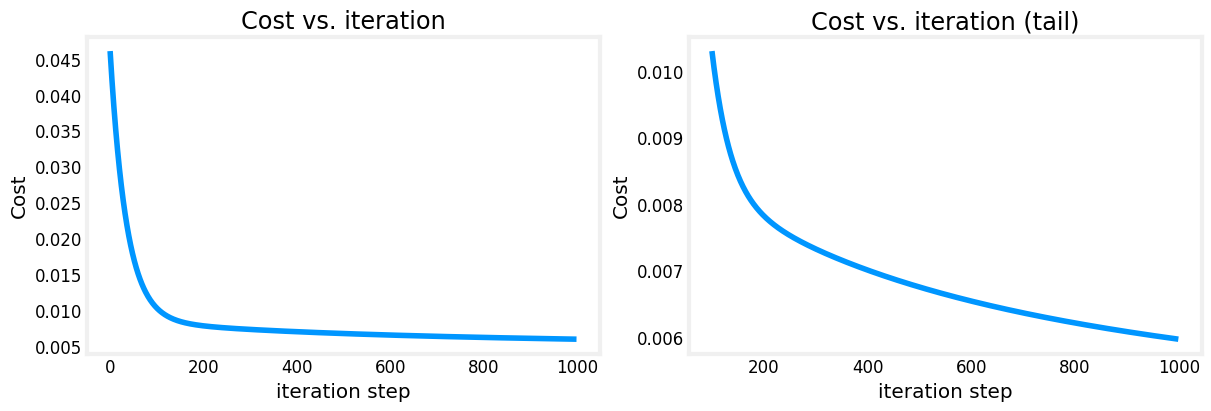

In [81]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

# Fifth learning rate is *0.05*

In [78]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 0.05
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient,
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(m):
    print(f"prediction: {np.dot(X_train[i], w_final) + b_final:0.2f}, target value: {y_train[i]}")

Iteration    0: Cost     0.04   
Iteration  100: Cost     0.01   
Iteration  200: Cost     0.01   
Iteration  300: Cost     0.00   
Iteration  400: Cost     0.00   
Iteration  500: Cost     0.00   
Iteration  600: Cost     0.00   
Iteration  700: Cost     0.00   
Iteration  800: Cost     0.00   
Iteration  900: Cost     0.00   
b,w found by gradient descent: 0.01,[ 0.19  0.07  0.2   0.12  0.04  0.03  0.03  0.07  0.08  0.1   0.06  0.02
  0.01 -0.02] 
prediction: 0.55, target value: 0.9999999999999999
prediction: 0.71, target value: 0.9090909090909091
prediction: 0.47, target value: 0.9090909090909091
prediction: 0.57, target value: 0.9060606060606061
prediction: 0.44, target value: 0.8363636363636363
prediction: 0.54, target value: 0.7878787878787878
prediction: 0.67, target value: 0.7272727272727273
prediction: 0.46, target value: 0.7272727272727273
prediction: 0.51, target value: 0.703030303030303
prediction: 0.51, target value: 0.6969696969696969
prediction: 0.53, target value: 0.696

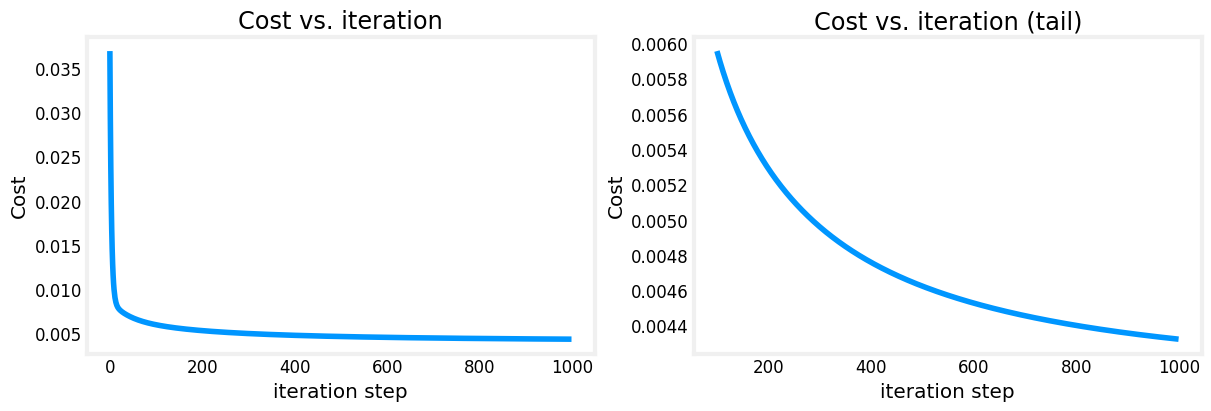

In [79]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step')
plt.show()

#*Conclusion* when i have use 0.000005 learning rate it will give me good values instead of other so in my case the learning best is 0.00005